In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                           #This is used for data visualization
#Below are the libraries for evaluation of classification machine learning models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler                                #Used for standarization of input features 
from sklearn.svm import SVC                                                     #Support Vector Machine Model 
from sklearn.preprocessing import Normalizer                                    #Used for normalization of input features
from sklearn.linear_model import LogisticRegression                             #Logistic Regression Model 
from sklearn.naive_bayes import GaussianNB                                      #Gaussian Naive Bayes Model
from sklearn.ensemble import RandomForestClassifier 

In [18]:
df = pd.read_csv('heart.csv')  

In [19]:

df.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<Axes: ylabel='count'>

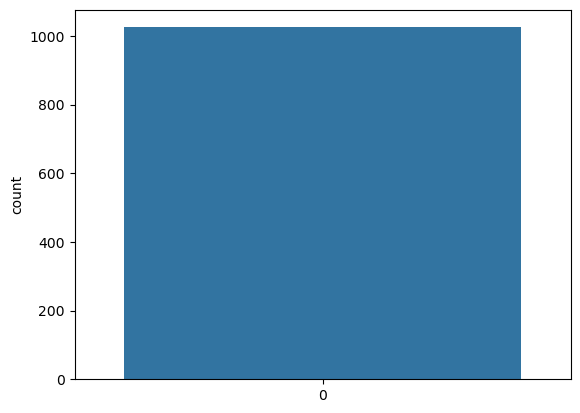

In [22]:
sns.countplot(df['target'])

AttributeError: 'numpy.int64' object has no attribute 'startswith'

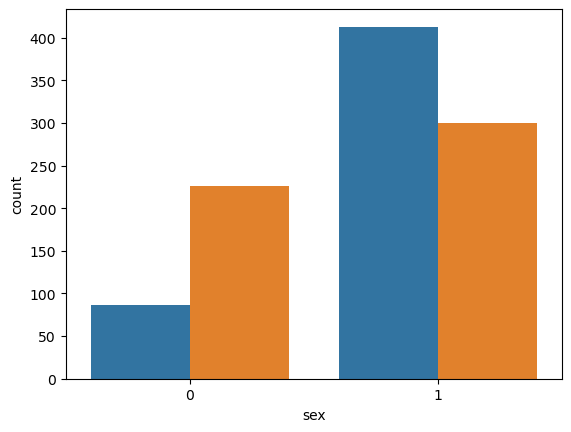

In [23]:

sns.countplot(data = df, x = 'sex', hue = 'target')


<Axes: >

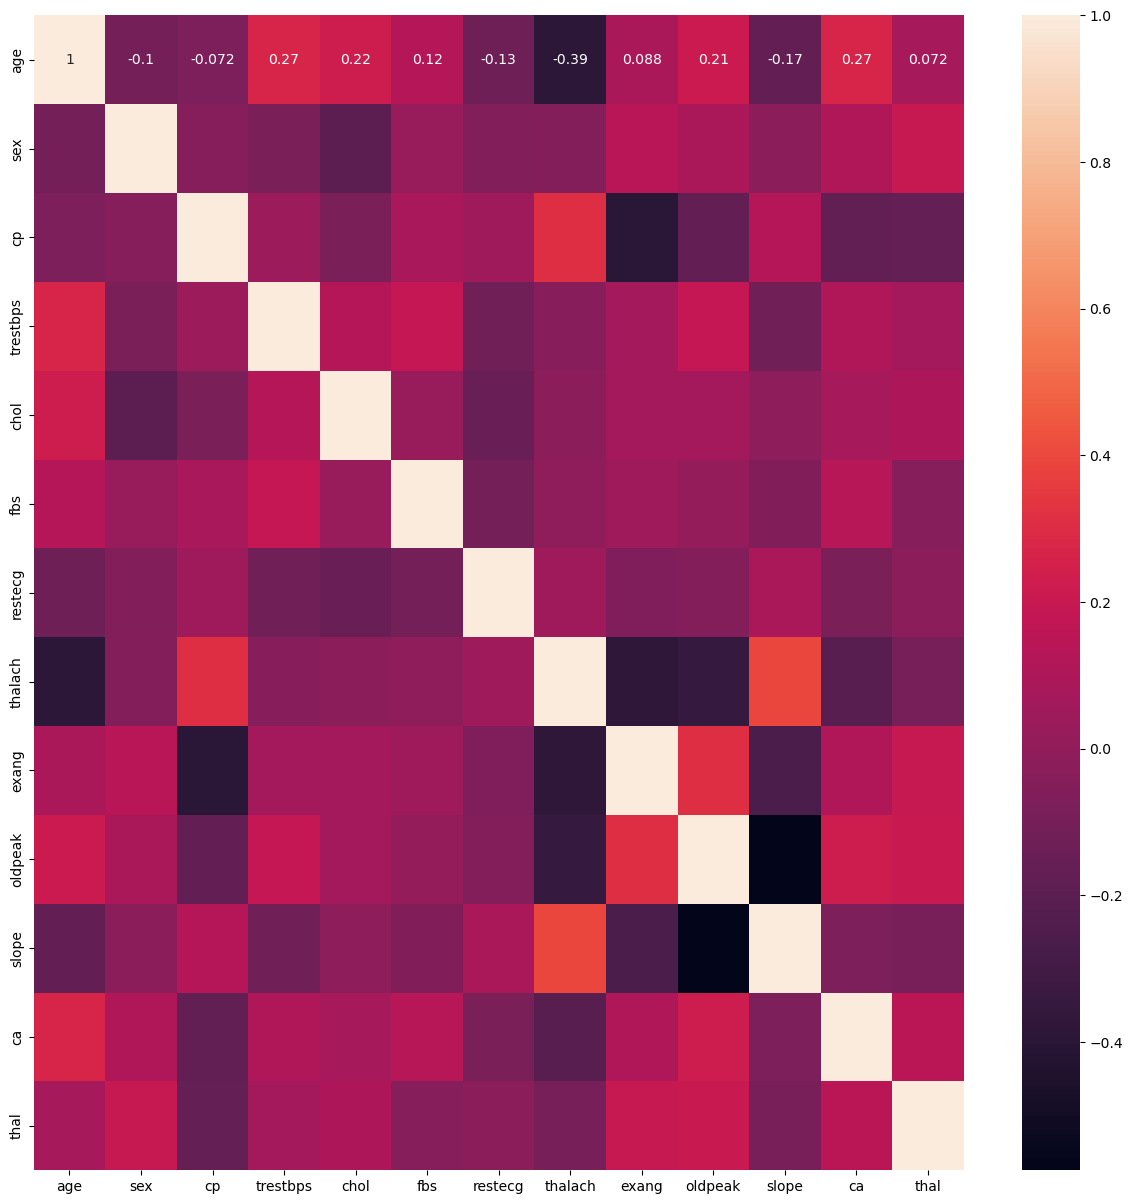

In [24]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.drop(['target'], axis = 1).corr(), annot = True)

<Axes: xlabel='age', ylabel='thalach'>

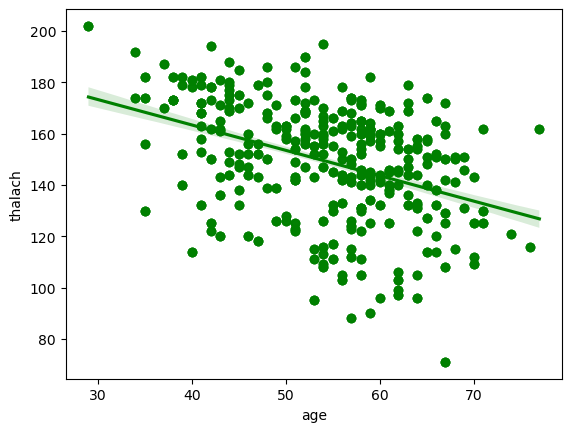

In [25]:
sns.regplot(x = 'age', y ='thalach', data = df, color = 'green')

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


C:\Users\shriy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shriy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shriy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shriy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

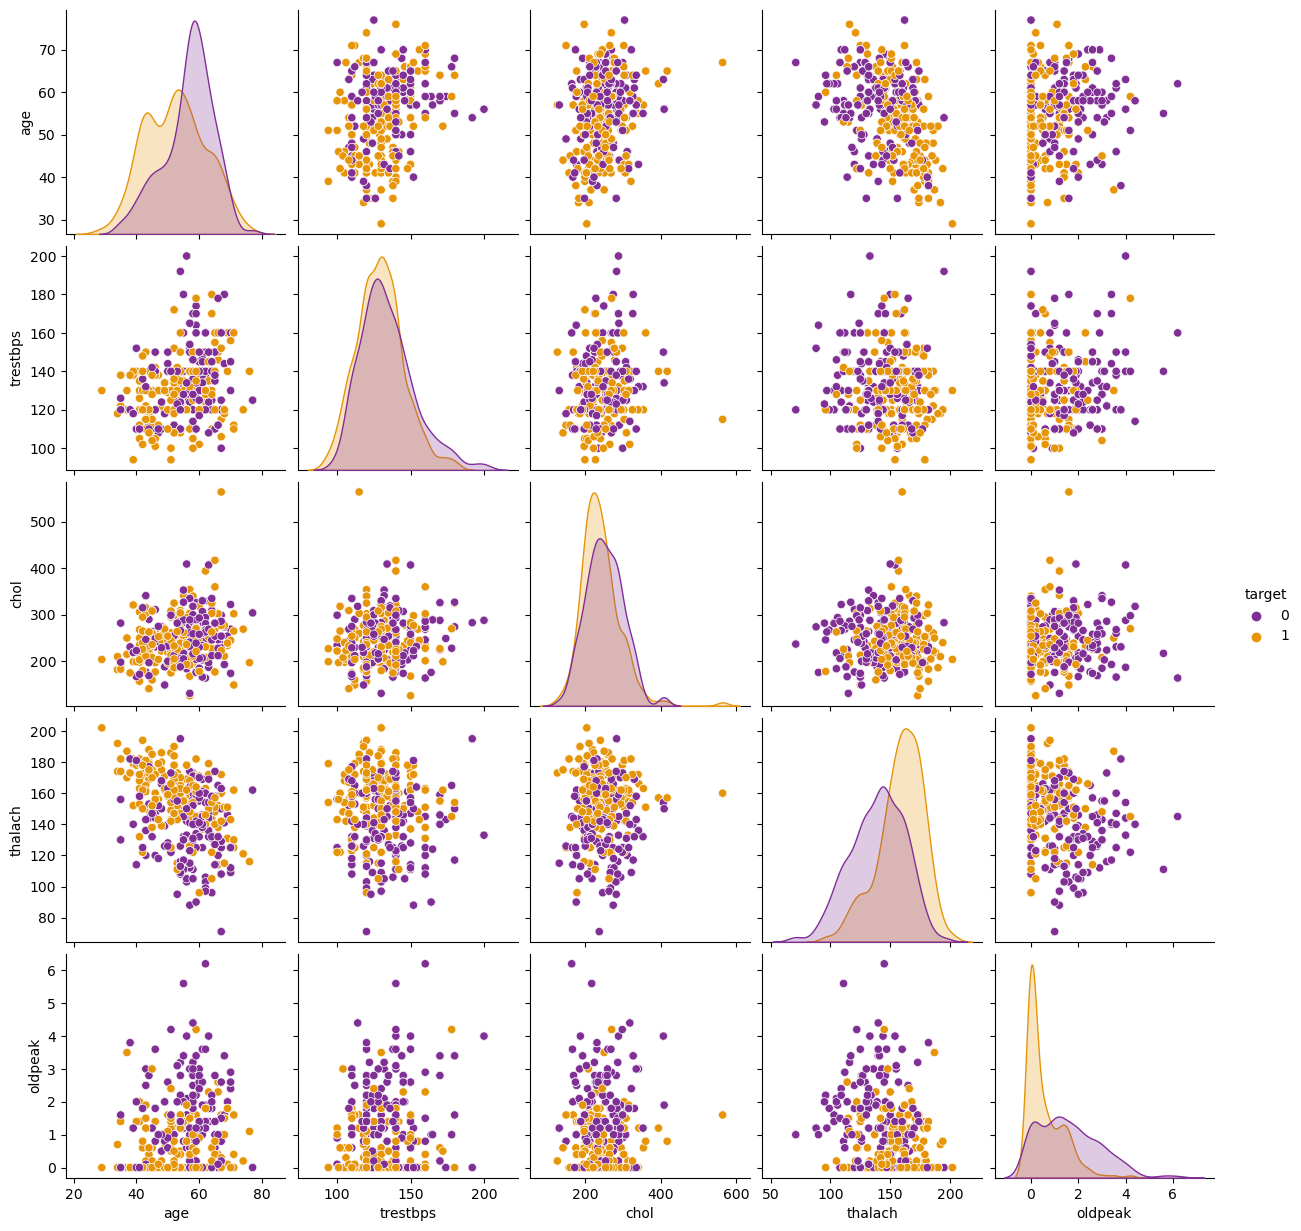

In [27]:

sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue = 'target', palette = 'CMRmap')

<Axes: xlabel='age', ylabel='chol'>

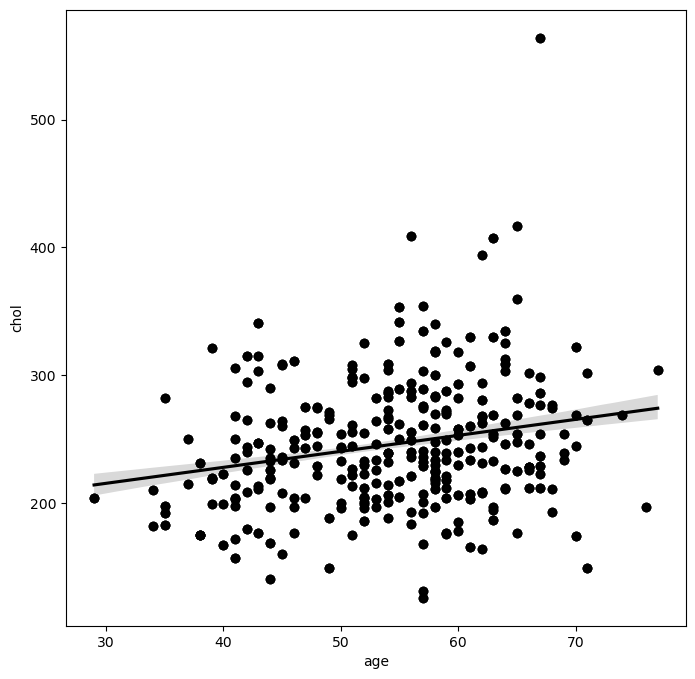

In [28]:
plt.figure(figsize = (8, 8))
sns.regplot(data = df, x = 'age', y = 'chol', color = 'black')

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='chol'>

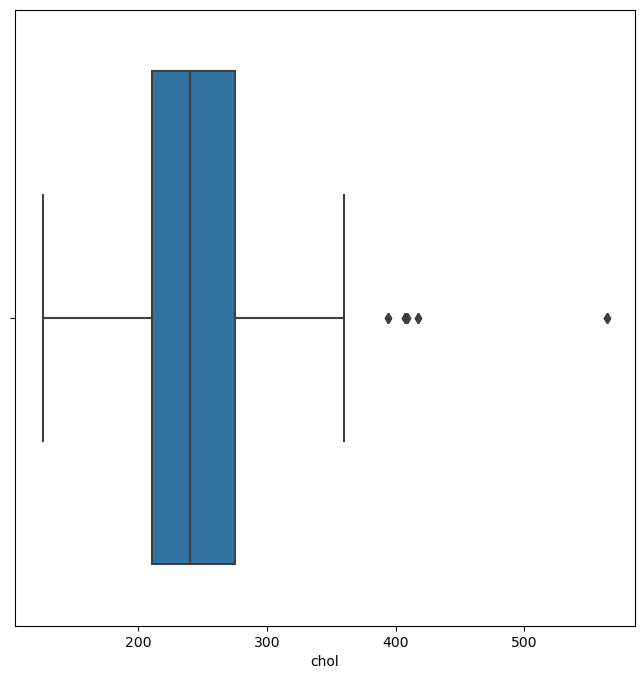

In [30]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'chol')

<Axes: xlabel='thalach'>

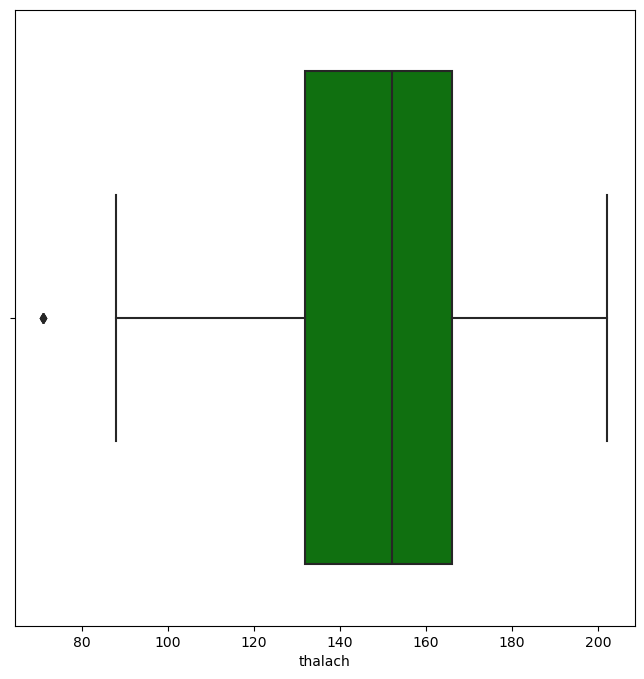

In [31]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'thalach', color = 'green')

<Axes: ylabel='age'>

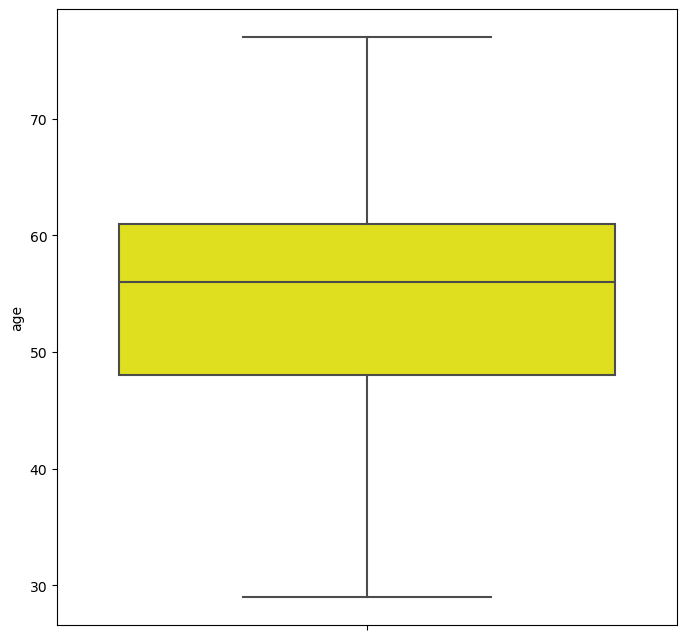

In [32]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, y = 'age', color = 'yellow')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [36]:
X_train.shape   

(717, 13)

In [37]:
X_test.shape 

(308, 13)

In [38]:
accuracy_scaled = []             #This creates an empty list which would be later filled with values
f1_score_scaled = []
precision_score_scaled = []
recall_score_scaled = []
roc_auc_score_scaled = []
log_loss_scaled = []

accuracy_normalized = []
f1_score_normalized = []
precision_score_normalized = []
recall_score_normalized = []
roc_auc_score_normalized = []
log_loss_normalized = []

In [39]:
#scaling


scaler = StandardScaler()                                                 
scaler.fit(X_train)                                    
X_train_scaled = scaler.transform(X_train)             
X_test_scaled = scaler.transform(X_test)  

In [40]:
#normalization


normalizer = Normalizer()                              
normalizer.fit(X_train)                               
X_train_normalized = normalizer.transform(X_train)    
X_test_normalized = normalizer.transform(X_test) 

In [41]:
neigh1 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instance of KNeighborsClassifier()
neigh1.fit(X_train_scaled, y_train)                     #Fitting the model with X_train_scaled and y_train 
neigh2 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instace of KNeighborsClassifier()
neigh2.fit(X_train_normalized, y_train)   

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_test_predict_scaled = neigh1.predict(X_test_scaled)                   #Getting the predicted output of the fit models
y_test_predict_normalized = neigh2.predict(X_test_normalized)

In [43]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))              #Appending the results with lists 
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

In [44]:


#logisitcregression




clf1 = LogisticRegression(random_state = 100)
clf2 = LogisticRegression(random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [45]:

#append in lists

accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

In [46]:
#naive bayes




clf1 = GaussianNB()
clf2 = GaussianNB()
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [47]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

In [48]:

#random forest regressor


clf1 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf2 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [49]:


accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

Text(0.5, 1.0, 'Final scaled output results for machine learning models')

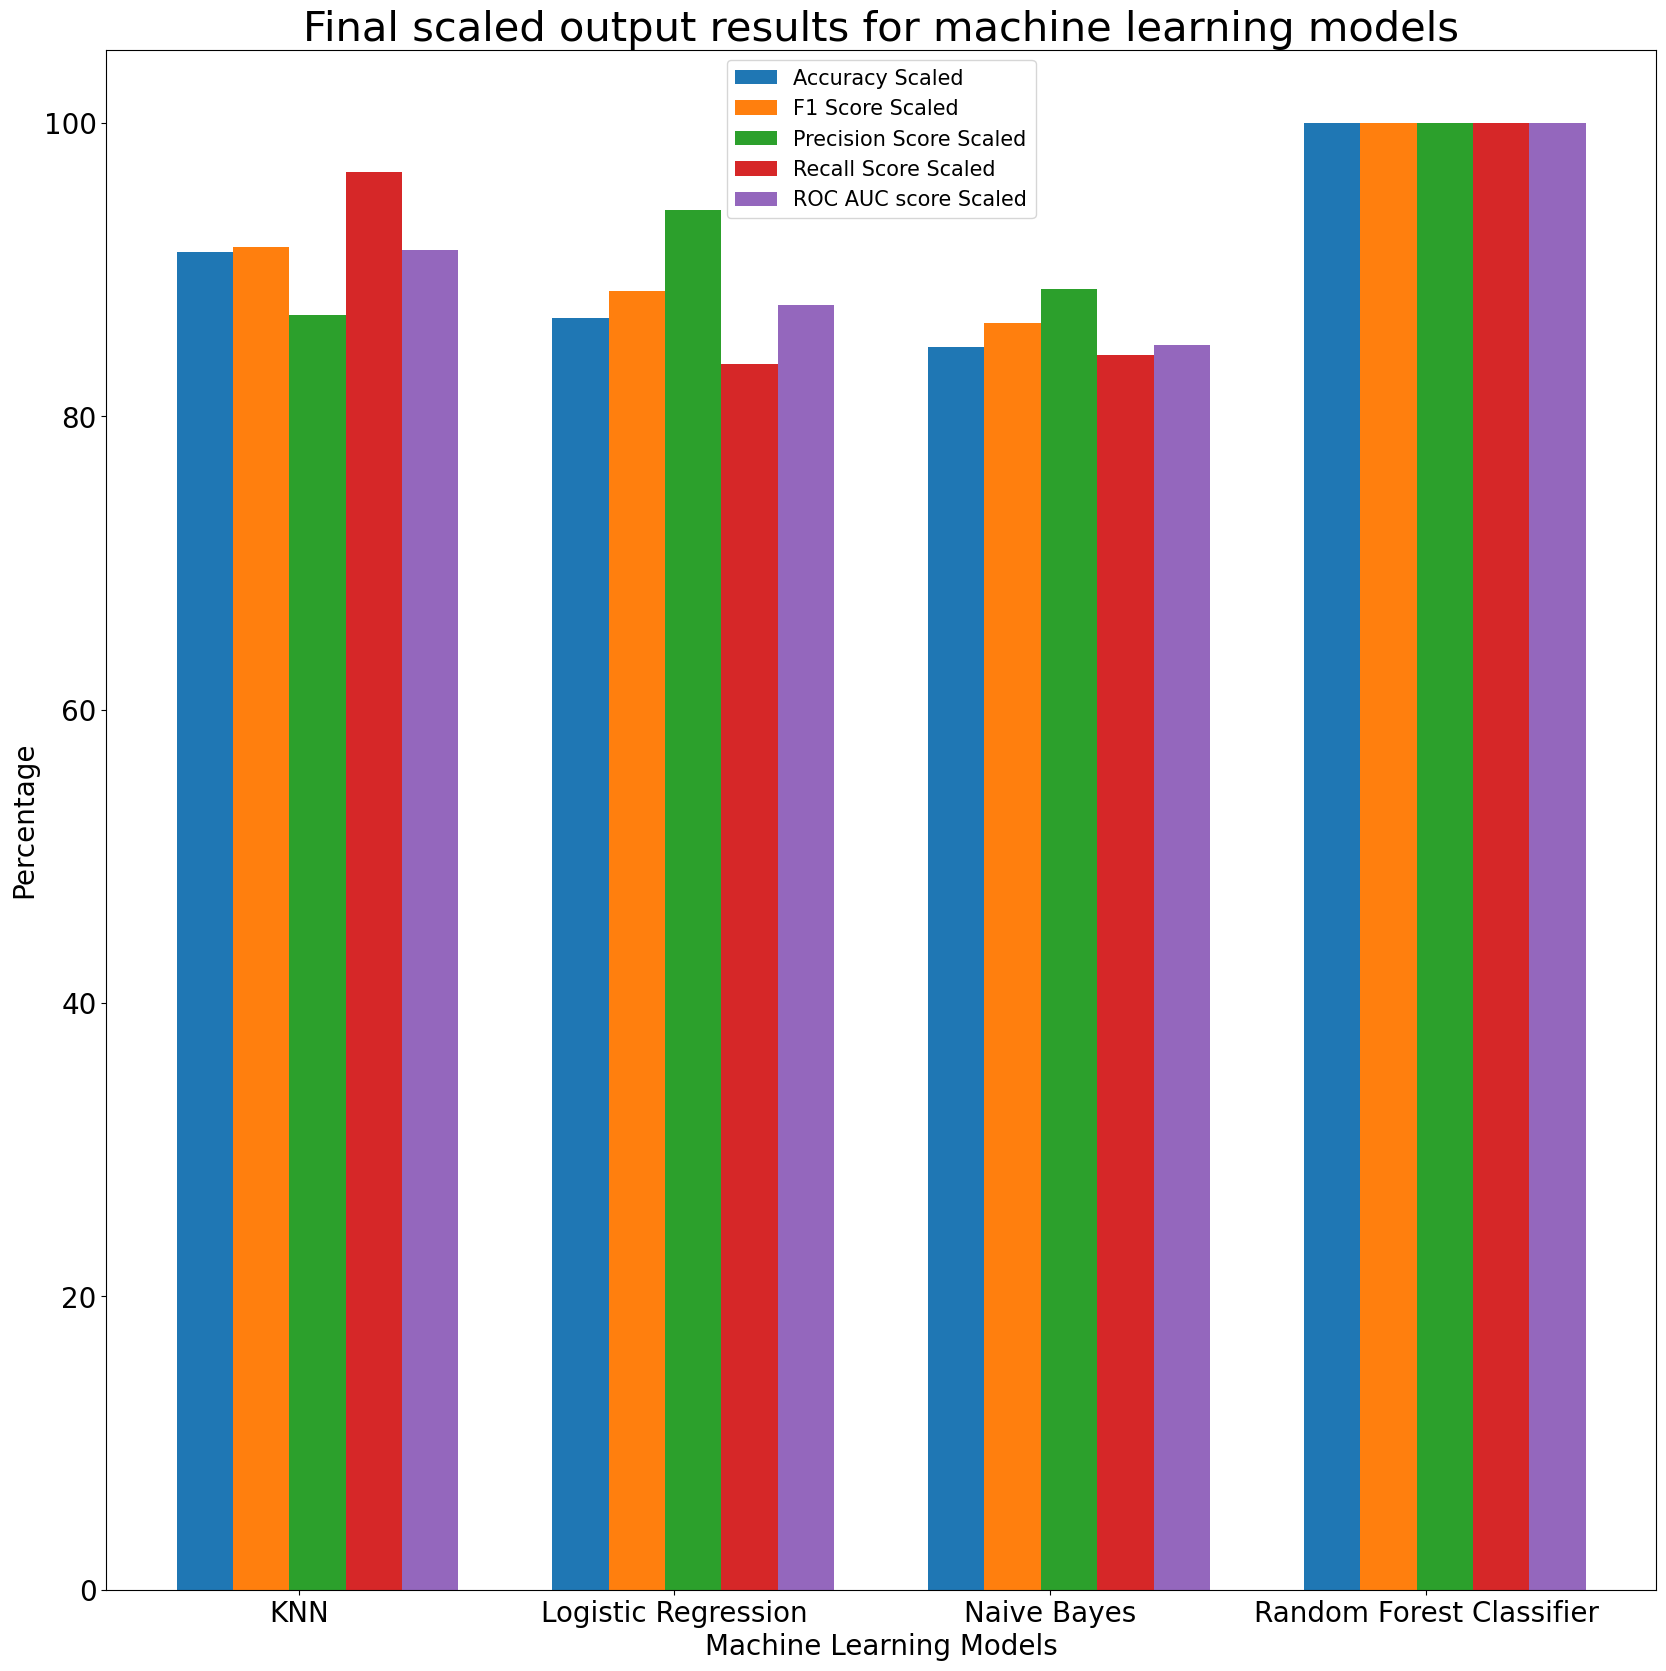

In [50]:
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (20, 20))           #Increasing the size of the figure so that it is clear 
plt.yticks(fontsize = 20)                #Increasing the fontsize of the y axis just to make it clear
#getting a barplot between models and accurcy_scaled list and multiplying those with 100 to make it clear in graph
plt.bar(models, [i * 100 for i in accuracy_scaled], width = 0.15) 
#Performing the same operations for other lists so that we would draw them later 
plt.bar(models + 0.15, [i * 100 for i in f1_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_scaled], width = 0.15)
plt.legend(['Accuracy Scaled', 'F1 Score Scaled', 'Precision Score Scaled', 'Recall Score Scaled', 'ROC AUC score Scaled'], fontsize = 15)
plt.xticks([i + 0.25 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20) #Creating a label for the x-axis 
plt.ylabel('Percentage', fontsize = 20)  #Creating a label for the y-axis 
plt.title('Final scaled output results for machine learning models', fontsize = 30)

Text(0.5, 1.0, 'Final normalized results for machine learning models')

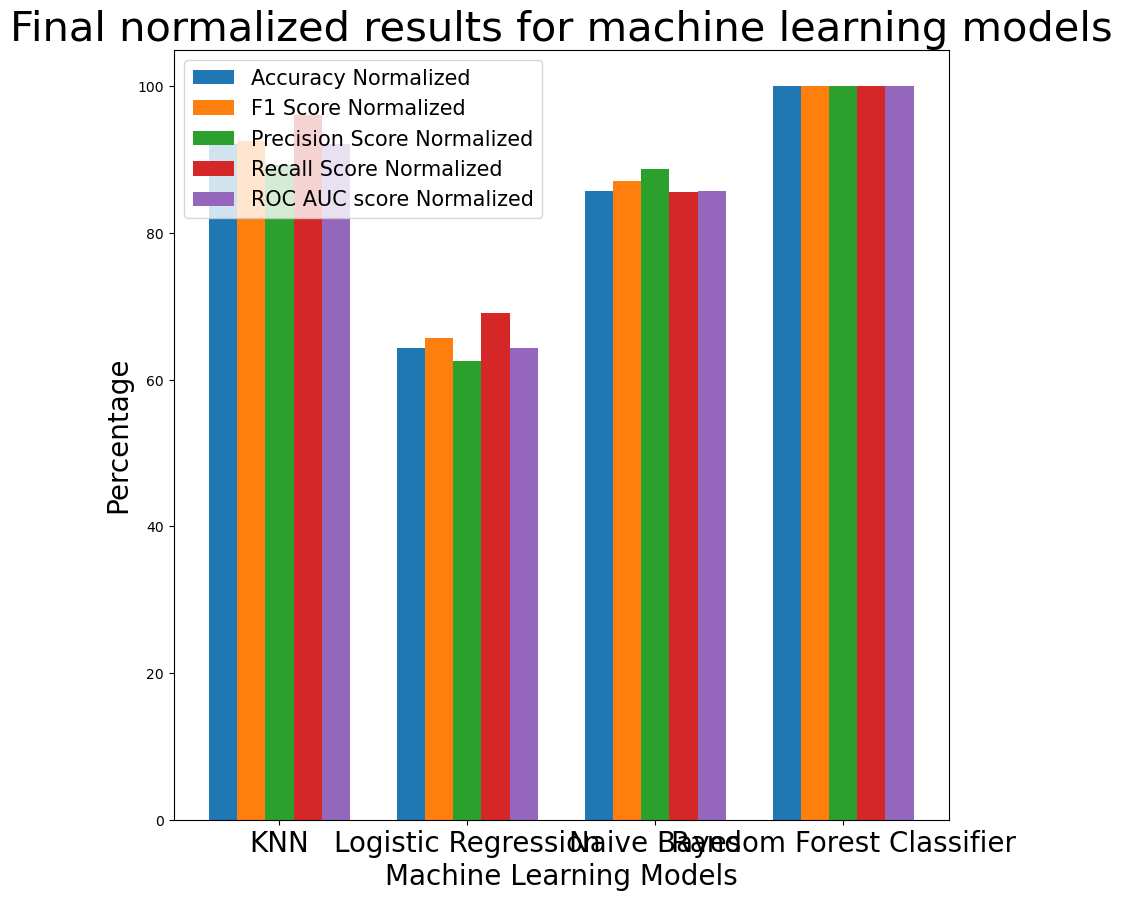

In [51]:
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (10, 10))
plt.yticks(fontsize = 10)
plt.bar(models, [i * 100 for i in accuracy_normalized], width = 0.15)
plt.bar(models + 0.15, [i * 100 for i in f1_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_normalized], width = 0.15)
plt.legend(['Accuracy Normalized', 'F1 Score Normalized', 'Precision Score Normalized', 'Recall Score Normalized', 'ROC AUC score Normalized'], fontsize = 15)
plt.xticks([i + 0.3 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.title("Final normalized results for machine learning models", fontsize = 30)